**A Guide for EAZY**

- Author: Rui Zhu  
- Time: 2023-09-09  
- Follow: 
    1. CSST Summer School 2022 - Liping Fu
    2. eazy_manual.pdf

Note:
1. EAZY的主要功能是：在考虑流量误差的情况下，找到观测流量和模版流量的最佳拟合；以此得到最佳红移和推荐的SED模板(即星系的类型)
2. 生成默认的配置文件: 进入工作目录, 执行命令`eazy`

---
## An EAZY demo (copy from CSST summer school)

### 输入文件结构
* `CSST-sample.cat`目标源的多波段测光和光谱红移星表
* `filters`目录: 存放需要的滤光片信息
    1. `CSST.RES`
    2. `CSST.RES.info`
* `templates`目录: SED模板
    1. `CWW+KIN`目录: SED模板1
    2. `EAZY_v1.1_lines`目录: SED模板2
    3. `Dusty`目录: SED模板3
    4. `DLAcoeff.txt` & `LAFcoeff.txt`: 计算IGM吸收需要的文件
    5. `TEMPLATE_ERROR.eazy_v1.0`: SED模板的误差文件
    6. `prior_K_extend.dat`: 先验文件
    7. `cww+kin.spectra.param` & `eazy_v1.2_dusty.spectra.param`: 模板配置文件
* `CSST.translate`: 描述各个波段流量数据在星表中的位置
* `zphot.param`: EAZY的配置文件

### Run EAZY
`eazy -p zphot.param -t CSST.translate`

### 输出文件结构


---
## 结果展示

### 载入输出文件

In [1]:
import eazy_toolbox as eazy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zout = eazy.Zout(output_dir='output/', output_file='photz', cache_file='photz.tempfilt')

### $z_{phot}-z_{spec}$图

<Axes: xlabel='$z_{spec}$', ylabel='$z_{best}$'>

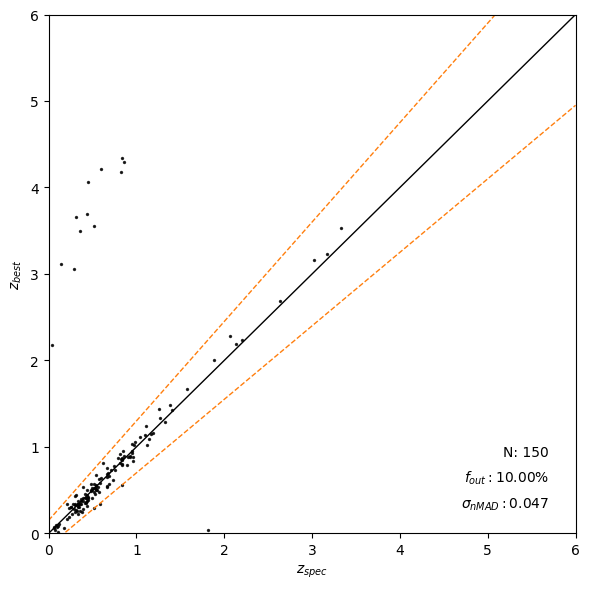

In [3]:
zout.zphot_zspec()

<Axes: xlabel='$z_{spec}$', ylabel='$z_{best}$'>

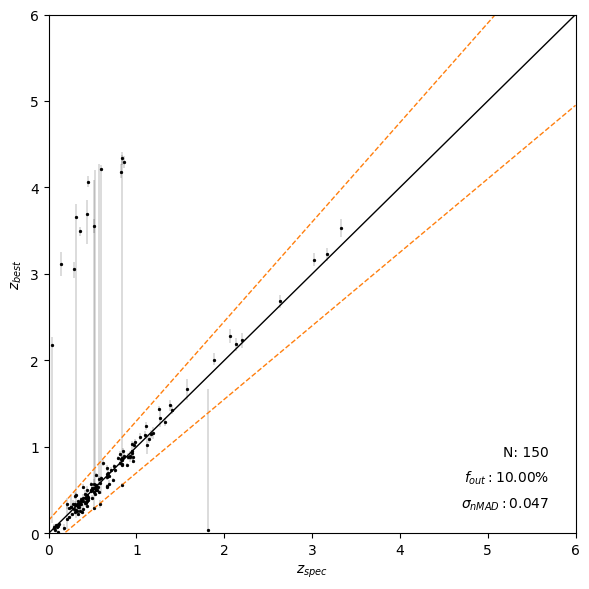

In [4]:
zout.zphot_zspec(errorbar=True)  # 显示误差棒

<Axes: xlabel='$z_{spec}$', ylabel='$z_{best}$'>

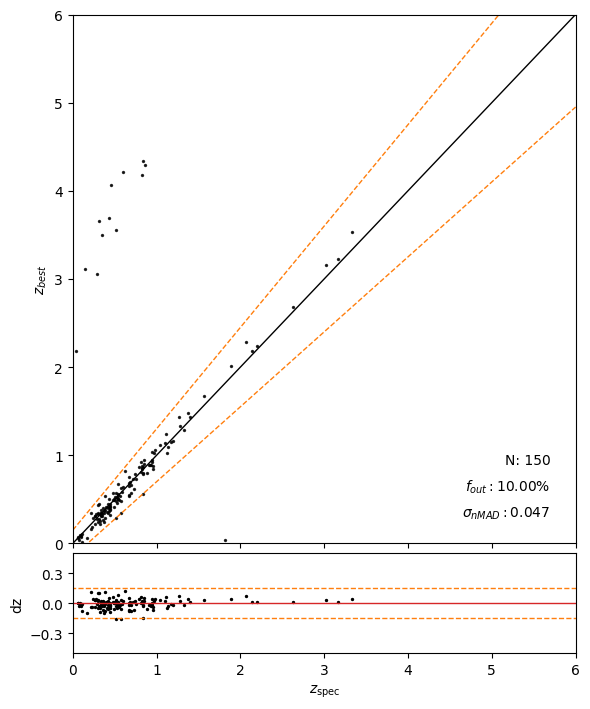

In [5]:
zout.zphot_zspec(plot_dz=True)  # 显示dz

### 展示SED拟合结果和PDF

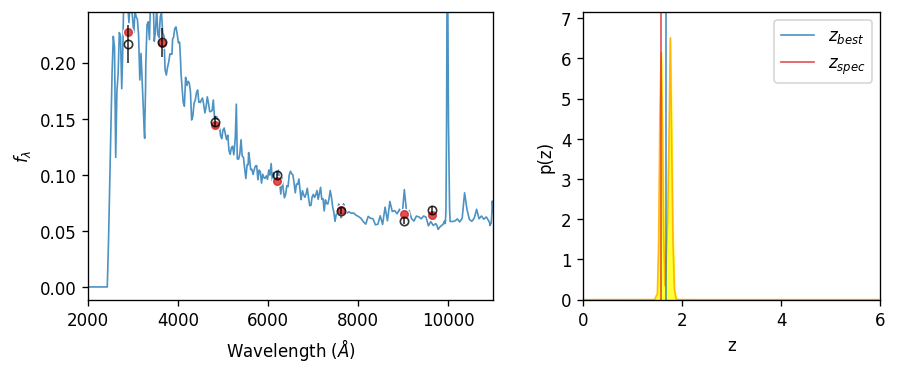

In [6]:
zout.show_fitting(idx=66, individual_templates=False)

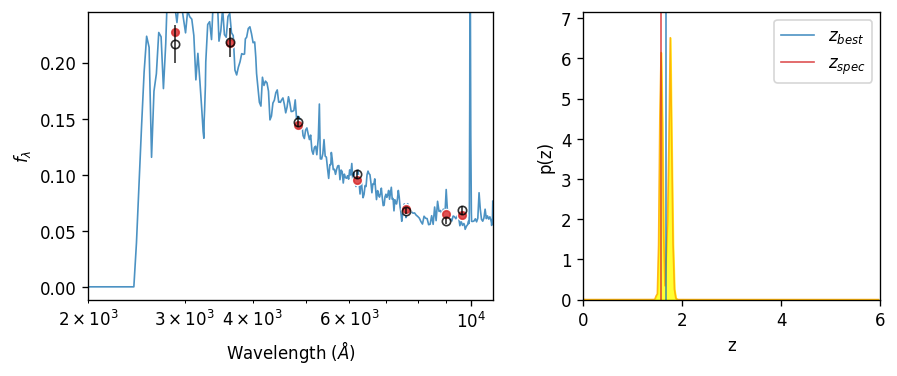

In [7]:
zout.show_fitting(idx=66, log_wavelen=True)  # log scale横轴

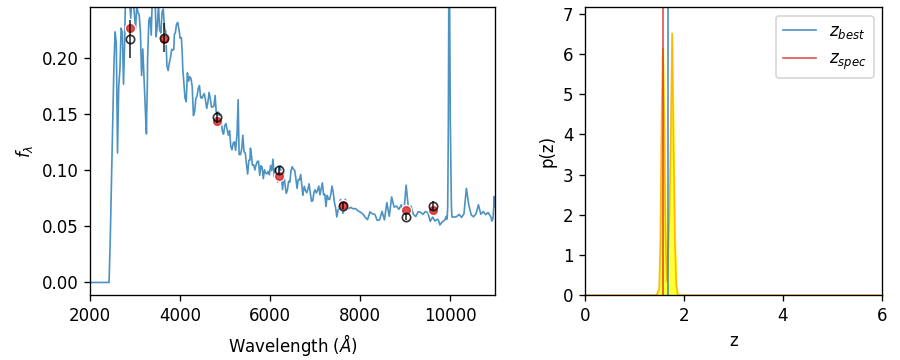

In [11]:
zout.show_fitting(idx=350802, id_is_idx=True)  # 使用id进行检索

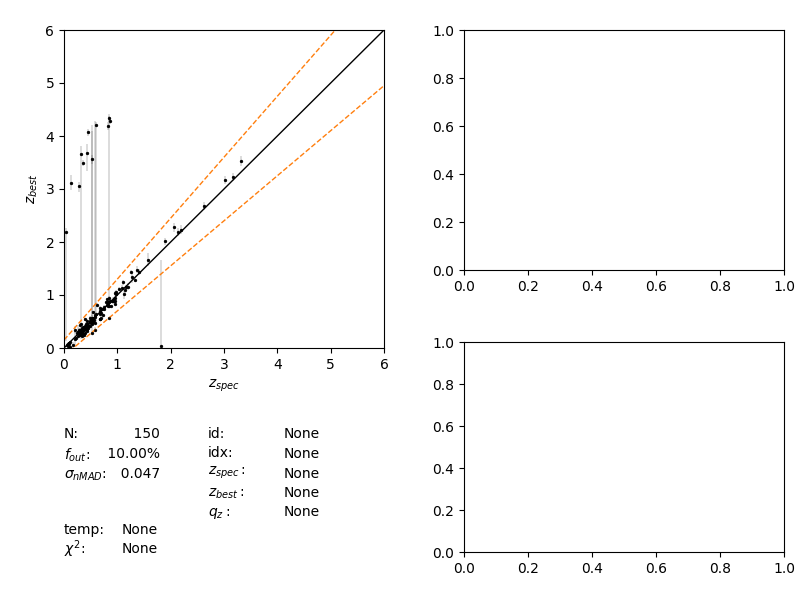

In [9]:
%matplotlib widget
zout.plot_all(errorbar=True)